# Vente des produits à l'année


## Contexte

Le client a commencé à enregistrer les données à partir de 2016 et le jeu de donnée se termine en 2018.

## Visualisation des données

In [9]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
    data_path = yaml.load(fp)
df_oder_item = pd.read_csv(data_path['olist_order_items_dataset'])
df_product = pd.read_csv(data_path['olist_products_dataset'])
df_orders = pd.read_csv(data_path['olist_orders_dataset'])
translation = pd.read_csv(data_path['product_category_name_translation'])
df = pd.merge(df_product, df_oder_item, on='product_id')
df = pd.merge(df, df_orders, on='order_id')
df = pd.merge(df, translation, on='product_category_name')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_approved_at_ym'] = df['order_approved_at'].dt.to_period('M')
df['order_approved_at_ymd'] = df['order_approved_at'].dt.to_period('d')
df.sort_values(by="order_approved_at_ym", inplace=True)
df.sort_values(by="order_approved_at_ymd", inplace=True)

C:\Users\Verner\miniconda3\envs\tp\lib\site-packages\ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


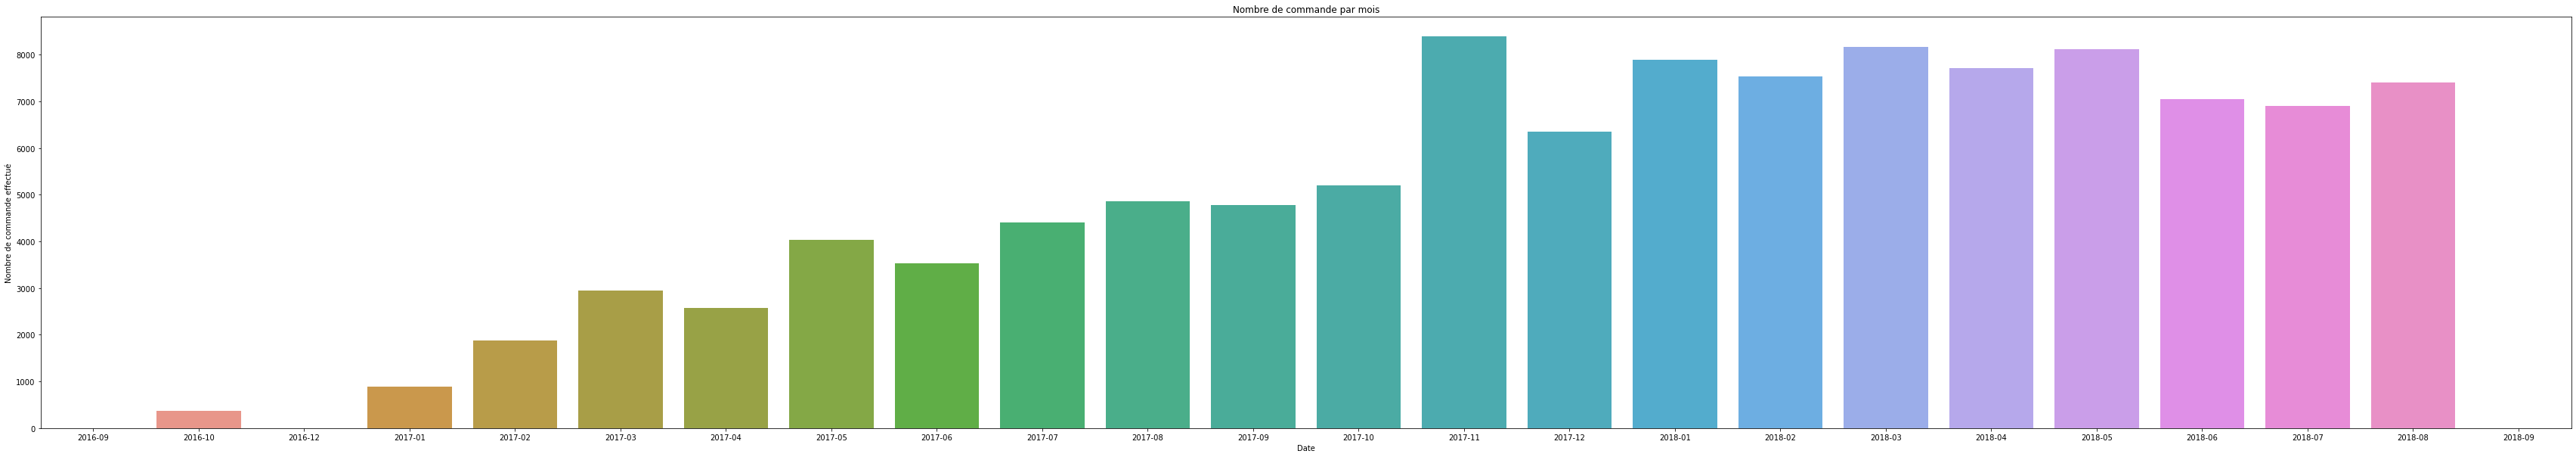

In [2]:
plt.figure(figsize=(60,10))
sns.countplot(data=df, x='order_approved_at_ym')
plt.ylabel("Nombre de commande effectué")
plt.xlabel("Date")
plt.title("Nombre de commande par mois")
plt.savefig('../params/plot/product_year/order_by_month.png')
plt.show()


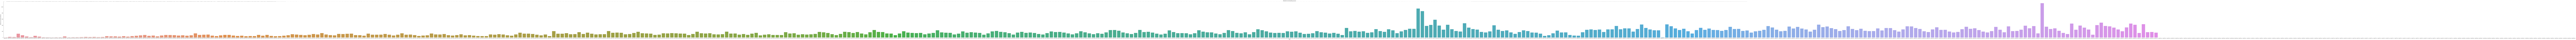

In [5]:
plt.figure(figsize=(700,10))
sns.countplot(data=df, x='order_approved_at_ymd')
plt.ylabel("Nombre de commande effectué")
plt.xlabel("Date")
plt.title("Nombre de commande par jours")
plt.savefig('../params/plot/product_year/order_by_days.png')
plt.show()

## Analyse des graphiques

Les graphique manquent trop de donnée pour être exploitable. On voit une
 progression linéaire du site lors de la première année, avec un pic
 en novembre 2011; avec les données qu'on possède il est impossible de dire
 si ce pic est une anomalie ou si c'est un pic périodique.

Sur le graphique journalier, on peut cependant voir une certaine saisonarilité
chaque semaine. On peut supposer que cette saisonarilité signifie qu'il y a plus
de commandes en début des semaine qu'en fin de semaine.

On peut aussi supposer que les catégories de produit ont des variation selon la date.

## Hypothèse

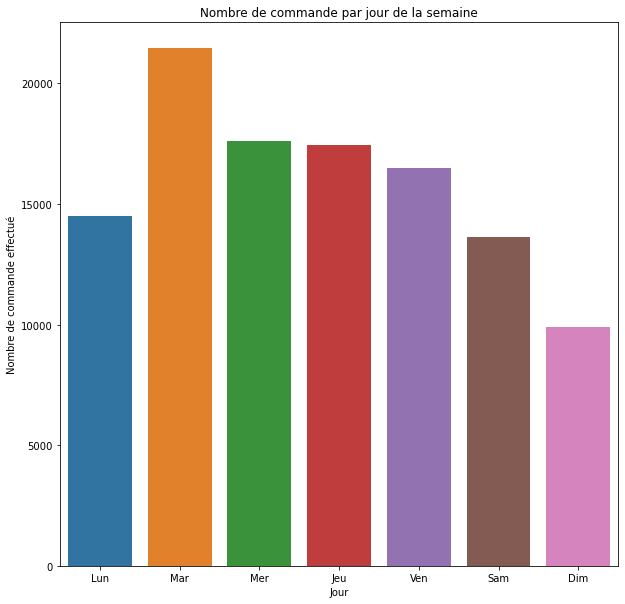

In [7]:
df['order_approved_at_day'] = df['order_approved_at'].dt.dayofweek
df.sort_values(by="order_approved_at_day", inplace=True)
df['order_approved_at_day'] = df['order_approved_at_day'].replace(
    {0:"Lun", 1:"Mar", 2:"Mer", 3:"Jeu", 4:"Ven", 5:"Sam", 6:"Dim"})
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='order_approved_at_day')
plt.ylabel("Nombre de commande effectué")
plt.xlabel("Jour")
plt.title("Nombre de commande par jour de la semaine")
plt.savefig('../params/plot/product_year/order_by_dayofweek.png')
plt.show()

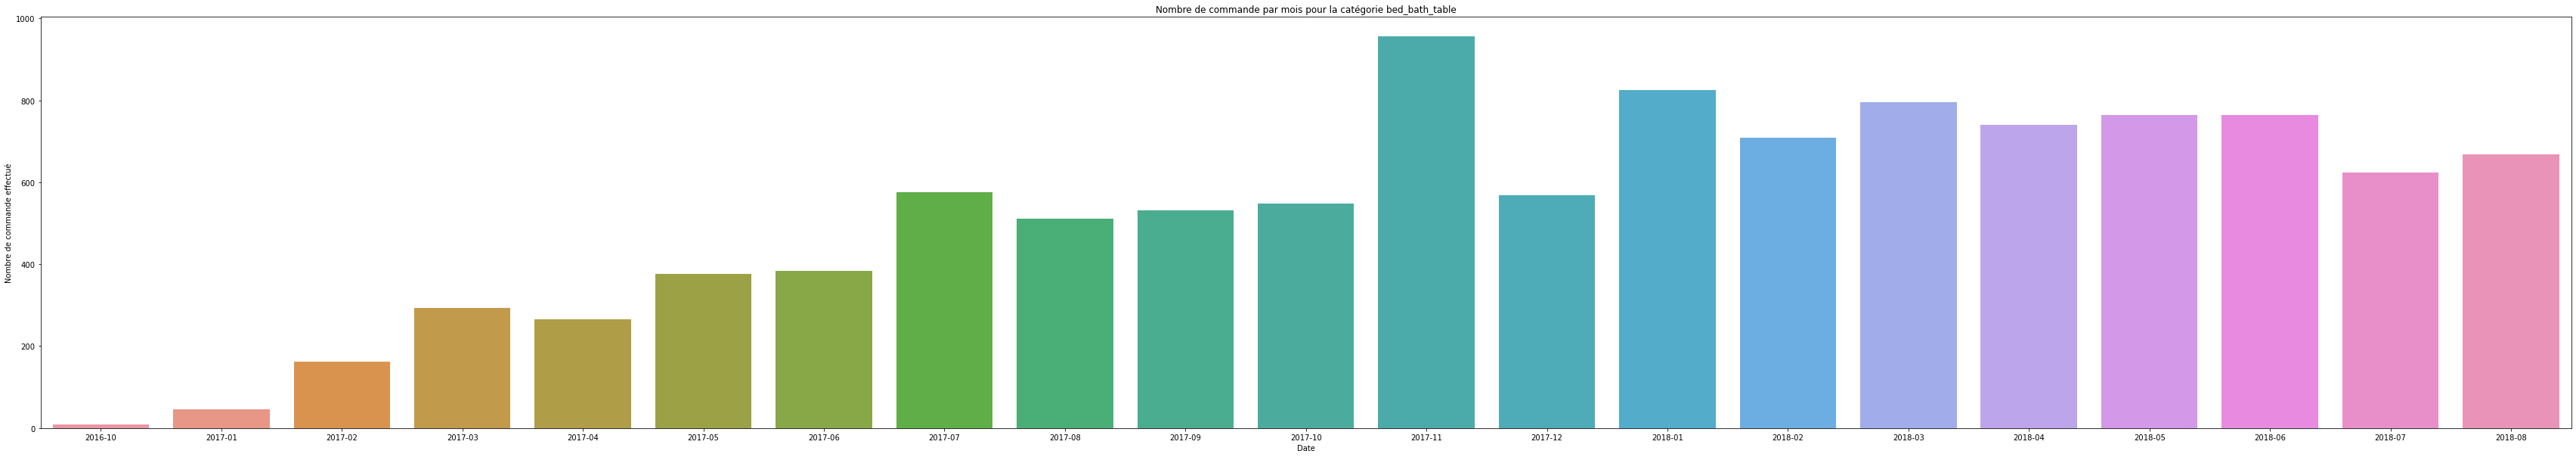

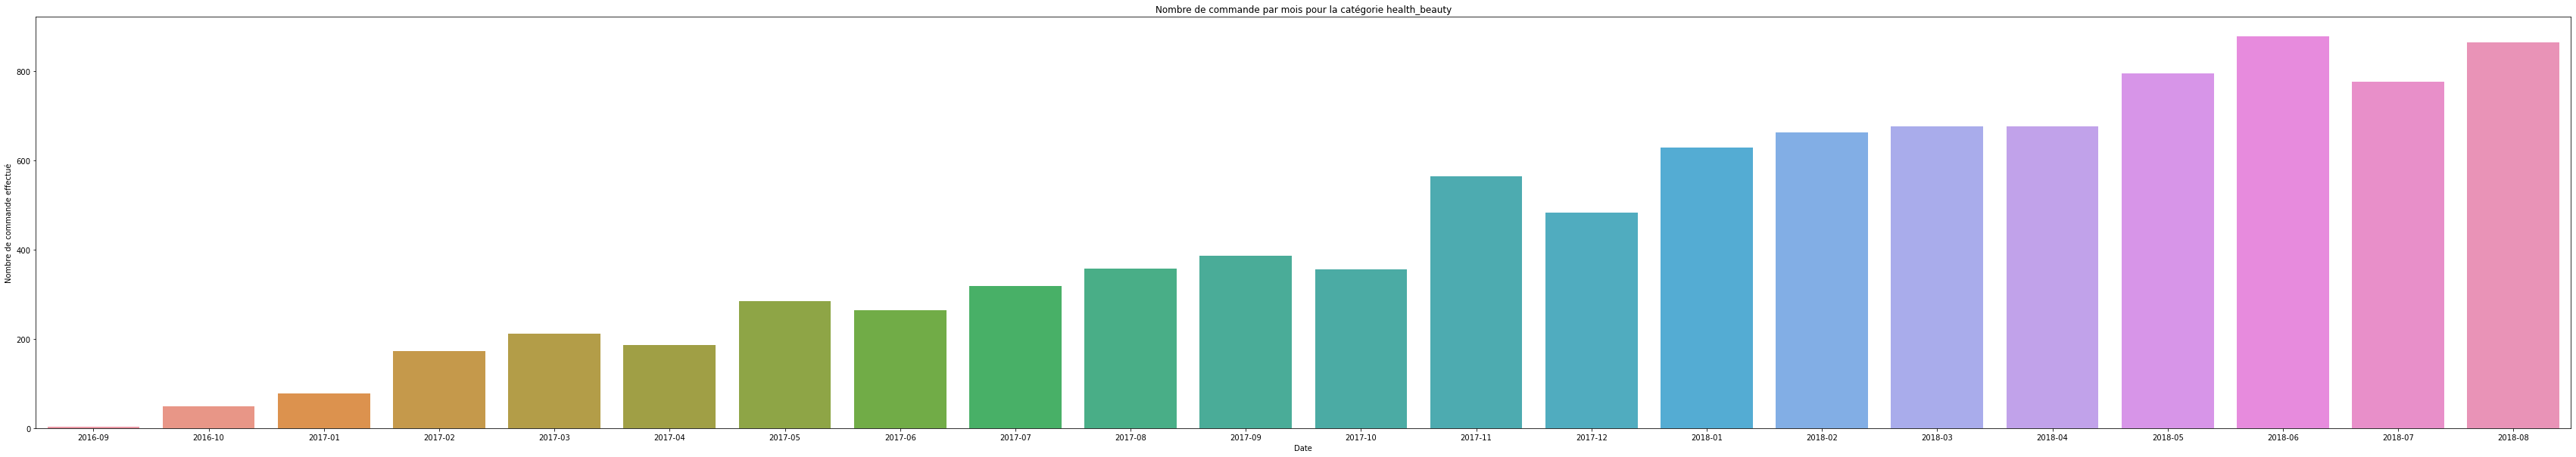

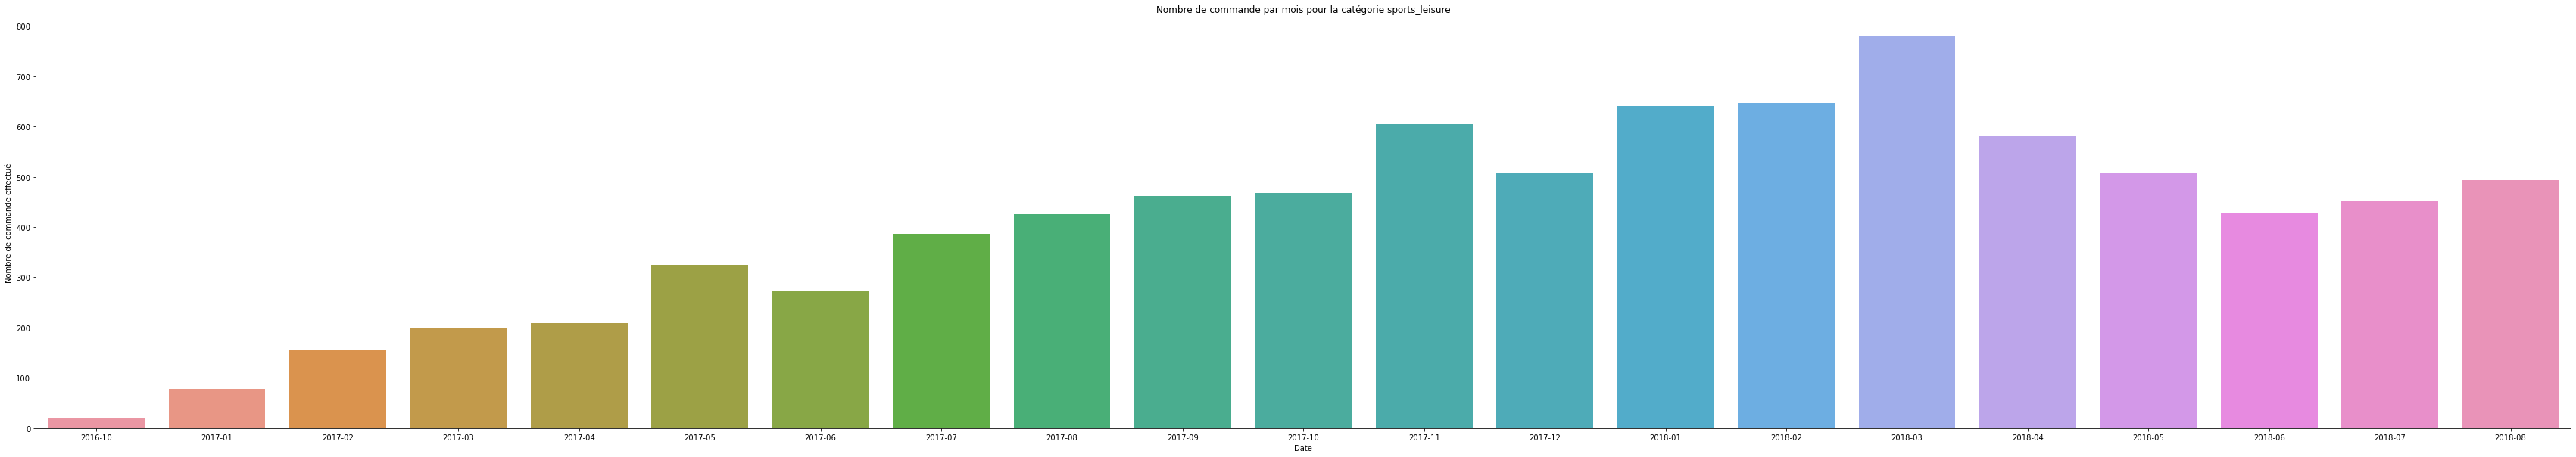

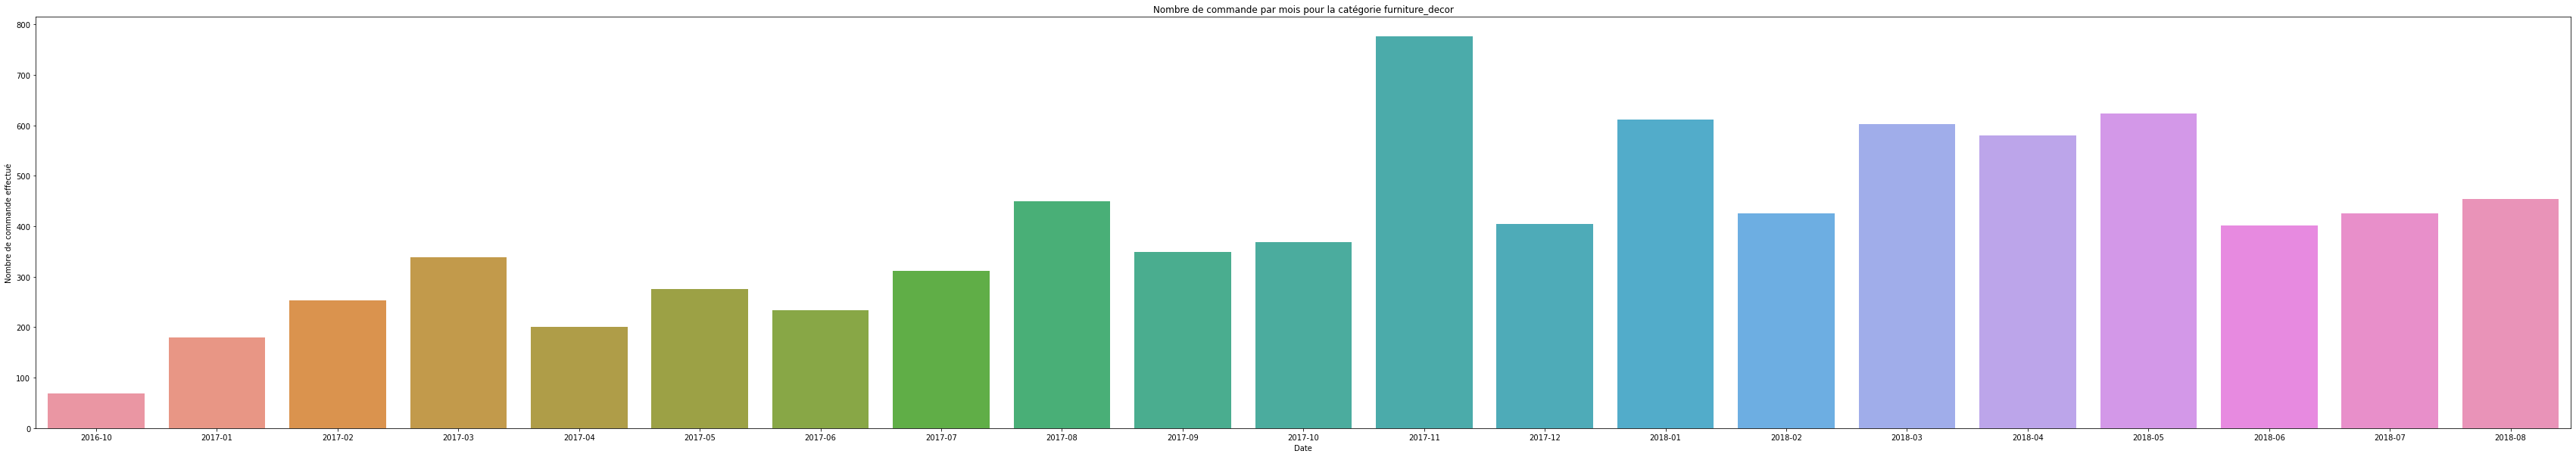

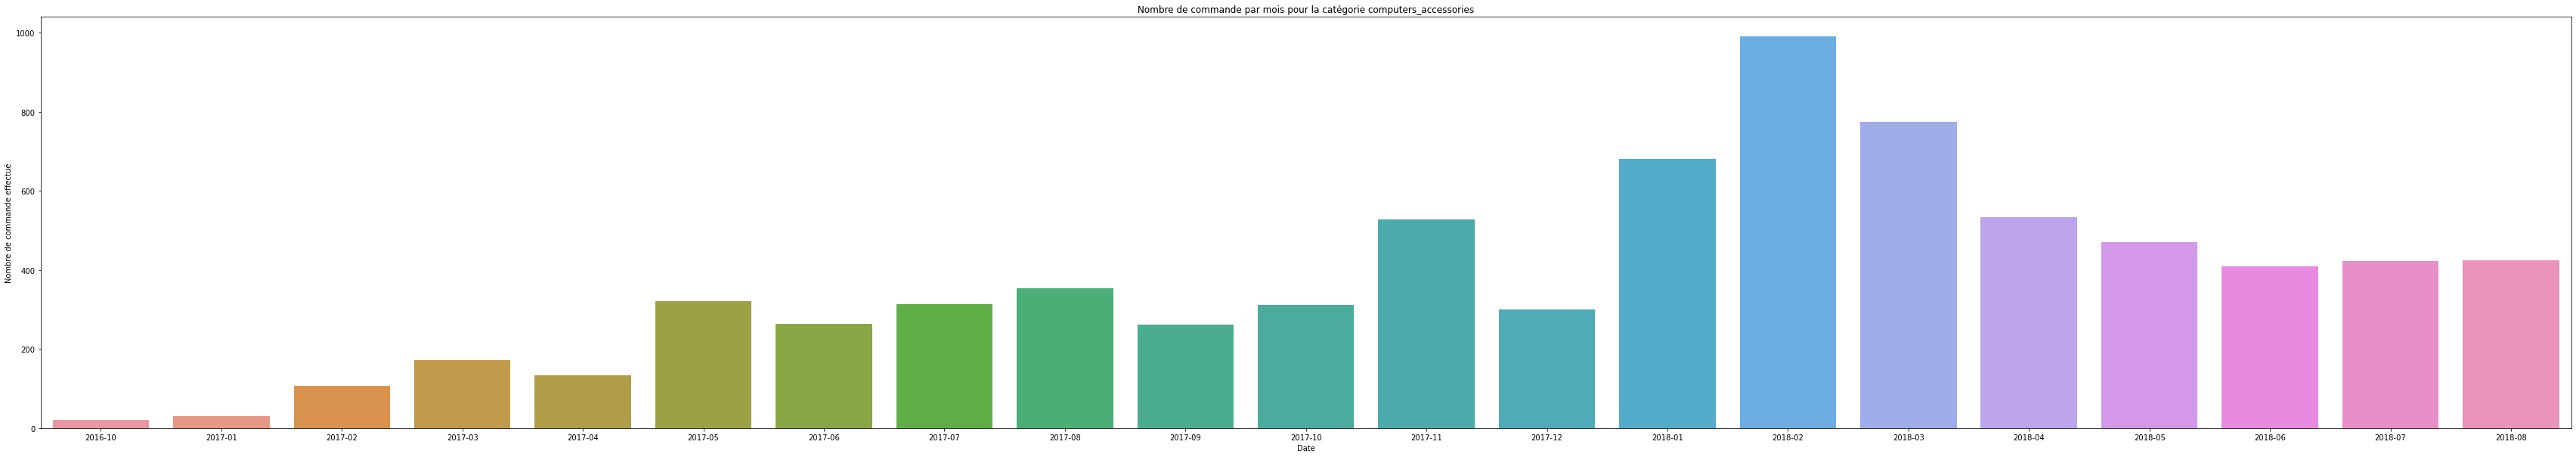

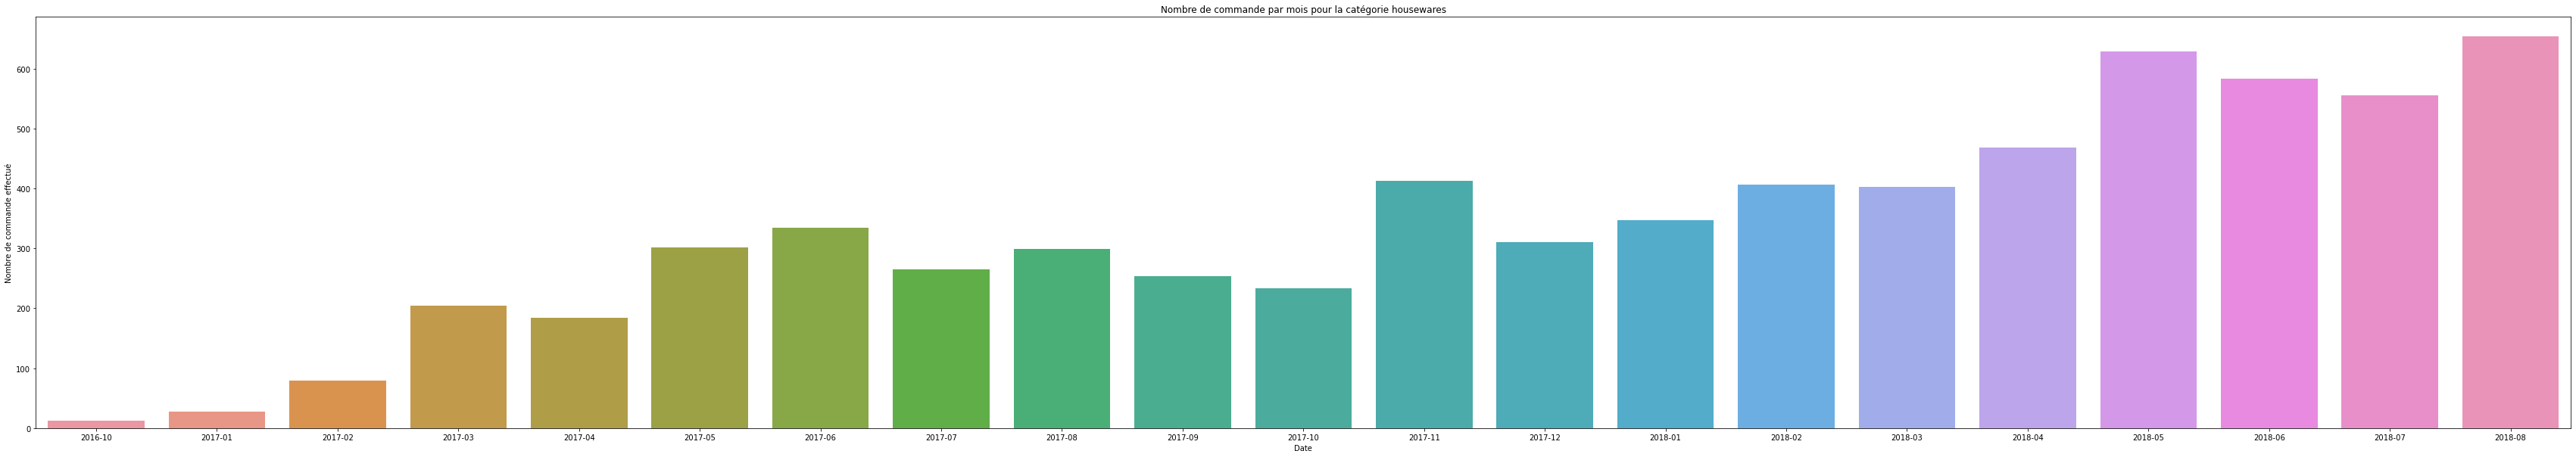

In [11]:
category_count = df['product_category_name_english'].value_counts()
category_list = category_count[category_count>6000].index.tolist()
for i in category_list:
    df_tmp = df[df['product_category_name_english']==i]
    plt.figure(figsize=(60,10))
    sns.countplot(data=df_tmp, x='order_approved_at_ym')
    plt.ylabel("Nombre de commande effectué")
    plt.xlabel("Date")
    plt.title('Nombre de commande par mois pour la catégorie %s' % i)
    plt.savefig('../params/plot/product_year/order_by_month_%s.png' % i)
    plt.show()

## Conclusion

On peut voir que les commandes sont effectuées le plus souvent le mardi puis que
c'est décroissant jusqu'au dimanche, le lundi ça remonte légèrement.

On peut voir que les catégories ont des ventes qui différent les unes des
autres selon la date.

Il faut plusieurs années de données supplémentaire pour observé une potentiel saisonarité.